In [ ]:
# Copyright (c) Meta Platforms, Inc. and affiliates.

## 1. Imports and Model Loading

In [1]:
import os
import imageio
import uuid
from IPython.display import Image as ImageDisplay
from inference import Inference, ready_gaussian_for_video_rendering, render_video, load_image, load_single_mask, display_image, make_scene, interactive_visualizer

/home/yun/Downloads/conda/envs/sam3d-objects/lib/python3.11/site-packages/torch/cuda/__init__.py:61: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml  # type: ignore[import]


Warp 1.11.0 initialized:
   CUDA Toolkit 12.9, Driver 12.8
   Devices:
     "cpu"      : "x86_64"
     "cuda:0"   : "NVIDIA GeForce RTX 4090" (24 GiB, sm_89, mempool enabled)
   Kernel cache:
     /home/yun/.cache/warp/1.11.0


2026-01-30 14:11:59.077 | INFO     | sam3d_objects.pipeline.inference_pipeline:set_attention_backend:17 - GPU name is NVIDIA GeForce RTX 4090


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


2026-01-30 14:11:59.889 | INFO     | sam3d_objects.model.backbone.tdfy_dit.modules.sparse:__from_env:39 - [SPARSE] Backend: spconv, Attention: sdpa
2026-01-30 14:12:01.927 | INFO     | sam3d_objects.model.backbone.tdfy_dit.modules.attention:__from_env:30 - [ATTENTION] Using backend: sdpa


[SPARSE][CONV] spconv algo: auto


2026-01-30 14:12:02.428 | WARNING  | sam3d_objects.data.dataset.tdfy.preprocessor:__post_init__:51 - No rgb pointmap normalizer provided, using scale + shift 
2026-01-30 14:12:02.428 | WARNING  | sam3d_objects.data.dataset.tdfy.preprocessor:__post_init__:51 - No rgb pointmap normalizer provided, using scale + shift 


In [2]:
PATH = os.getcwd()
TAG = "hf"
config_path = f"{PATH}/../checkpoints/{TAG}/pipeline.yaml"
inference = Inference(config_path, compile=False)

2026-01-30 14:12:02.446 | WARNING  | sam3d_objects.data.dataset.tdfy.preprocessor:__post_init__:51 - No rgb pointmap normalizer provided, using scale + shift 
/home/yun/Downloads/conda/envs/sam3d-objects/lib/python3.11/site-packages/moge/model/v1.py:171: UserWarning: The following deprecated/invalid arguments are ignored: {'output_mask': True, 'split_head': True}
  warnings.warn(f"The following deprecated/invalid arguments are ignored: {deprecated_kwargs}")
2026-01-30 14:12:05.119 | WARNING  | sam3d_objects.data.dataset.tdfy.preprocessor:__post_init__:51 - No rgb pointmap normalizer provided, using scale + shift 
2026-01-30 14:12:05.120 | INFO     | sam3d_objects.pipeline.inference_pipeline:__init__:100 - self.device: cuda
2026-01-30 14:12:05.120 | INFO     | sam3d_objects.pipeline.inference_pipeline:__init__:101 - CUDA_VISIBLE_DEVICES: None
2026-01-30 14:12:05.120 | INFO     | sam3d_objects.pipeline.inference_pipeline:__init__:102 - Actually using GPU: 0
2026-01-30 14:12:05.121 | INFO

## 2. Load input image to lift to 3D (single object)

/home/yun/Documents/code/sam-3d-objects/notebook/inference.py:404: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


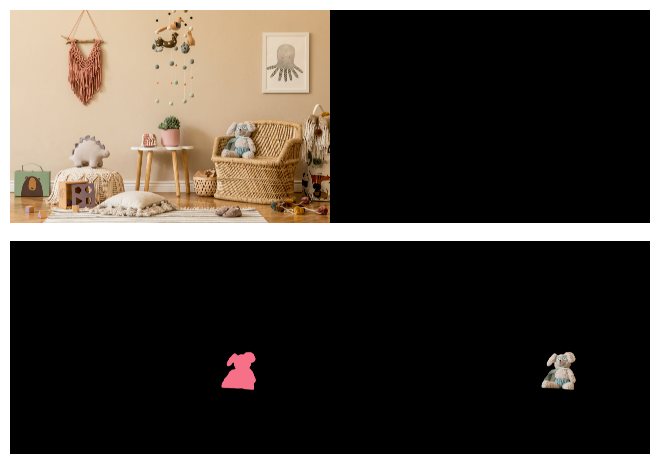

In [3]:
IMAGE_PATH = f"{PATH}/images/shutterstock_stylish_kidsroom_1640806567/image.png"
IMAGE_NAME = os.path.basename(os.path.dirname(IMAGE_PATH))

image = load_image(IMAGE_PATH)
mask = load_single_mask(os.path.dirname(IMAGE_PATH), index=14)
display_image(image, masks=[mask])

## 3. Generate Gaussian Splat

In [4]:
# run model
output = inference(image, mask, seed=42)

# export gaussian splat (as point cloud)
output["gs"].save_ply(f"{PATH}/gaussians/single/{IMAGE_NAME}.ply")

2026-01-30 14:15:37.672 | INFO     | sam3d_objects.pipeline.inference_pipeline:sample_sparse_structure:664 - Sampling sparse structure: inference_steps=25, strength=7, interval=[0, 500], rescale_t=3, cfg_strength_pm=0.0
2026-01-30 14:15:37.673 | INFO     | sam3d_objects.pipeline.inference_pipeline:get_condition_input:633 - Running condition embedder ...
2026-01-30 14:15:37.742 | INFO     | sam3d_objects.pipeline.inference_pipeline:get_condition_input:637 - Condition embedder finishes!
2026-01-30 14:15:41.518 | INFO     | sam3d_objects.pipeline.inference_pipeline:sample_sparse_structure:714 - Downsampled coords from 26880 to 26325
2026-01-30 14:15:41.535 | INFO     | sam3d_objects.pipeline.inference_pipeline_pointmap:run:437 - Rescaling scale by 1 after downsampling
2026-01-30 14:15:41.535 | INFO     | sam3d_objects.pipeline.inference_pipeline:sample_slat:744 - Sampling sparse latent: inference_steps=25, strength=1, interval=[0, 500], rescale_t=1
2026-01-30 14:15:41.535 | INFO     | sam

## 4. Visualize Gaussian Splat
### a. Animated Gif

In [5]:
# render gaussian splat
scene_gs = make_scene(output)
scene_gs = ready_gaussian_for_video_rendering(scene_gs)

video = render_video(
    scene_gs,
    r=1,
    fov=60,
    pitch_deg=15,
    yaw_start_deg=-45,
    resolution=512,
)["color"]

# save video as gif
imageio.mimsave(
    os.path.join(f"{PATH}/gaussians/single/{IMAGE_NAME}.gif"),
    video,
    format="GIF",
    duration=1000 / 30,  # default assuming 30fps from the input MP4
    loop=0,  # 0 means loop indefinitely
)

# notebook display
ImageDisplay(url=f"gaussians/single/{IMAGE_NAME}.gif?cache_invalidator={uuid.uuid4()}")

Rendering: 300it [00:01, 293.05it/s]


### b. Interactive Visualizer

In [6]:
# might take a while to load (black screen)
interactive_visualizer(f"{PATH}/gaussians/single/{IMAGE_NAME}.ply")

* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://e27fdce2c7246c1e2a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
